## Importing Libraries

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [64]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [65]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


## Building Model

In [66]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [67]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling Model

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [17]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1664s 757ms/step - accuracy: 0.3872 - loss: 2.1668 - val_accuracy: 0.8247 - val_loss: 0.5640
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1653s 752ms/step - accuracy: 0.8294 - loss: 0.5355 - val_accuracy: 0.9055 - val_loss: 0.2876
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7264s 3s/step - accuracy: 0.9000 - loss: 0.3079 - val_accuracy: 0.9287 - val_loss: 0.2195
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1727s 786ms/step - accuracy: 0.9315 - loss: 0.2098 - val_accuracy: 0.9167 - val_loss: 0.2597
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1633s 744ms/step - accuracy: 0.9489 - loss: 0.1580 - val_accuracy: 0.9140 - val_loss: 0.2717
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1172s 534ms/step - accuracy: 0.9611 - loss: 0.1223 - val_accuracy: 0.9566 - val_loss: 0.1357
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 927s 422ms/step - accuracy: 0.9689 - loss: 0.0953 - val_accuracy: 0.9563 - val_loss: 0.1467
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 924s 421ms/step -

## Model Evaluation

In [37]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training set accuracy:', train_acc) 

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 376s 171ms/step - accuracy: 0.9839 - loss: 0.0458
Training set accuracy: 0.9857742190361023


In [38]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation set accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 58s 105ms/step - accuracy: 0.9579 - loss: 0.1426
Validation set accuracy: 0.9587411880493164


## Saving Model

In [39]:
cnn.save("trained_model.keras")

In [40]:
training_history.history

{'accuracy': [0.5893449187278748,
  0.8541432619094849,
  0.9103350043296814,
  0.9374066591262817,
  0.9538516402244568,
  0.9644213914871216,
  0.9703534841537476,
  0.9758731126785278,
  0.9794864654541016,
  0.9823031425476074],
 'loss': [1.391219139099121,
  0.4572176933288574,
  0.2754674553871155,
  0.18940037488937378,
  0.13957345485687256,
  0.11092913895845413,
  0.08952321112155914,
  0.07343795895576477,
  0.06437233835458755,
  0.05631391331553459],
 'val_accuracy': [0.8246642351150513,
  0.9055315256118774,
  0.9286933541297913,
  0.9167425632476807,
  0.9140109419822693,
  0.9565786719322205,
  0.9562941193580627,
  0.9662531018257141,
  0.9680742025375366,
  0.9587411880493164],
 'val_loss': [0.5639970302581787,
  0.28759127855300903,
  0.21946802735328674,
  0.25971314311027527,
  0.2717192471027374,
  0.13566052913665771,
  0.1466774344444275,
  0.11804872751235962,
  0.11050379276275635,
  0.1367158442735672]}

In [41]:
import json
with open("training_history.json","w") as f:
  json.dump(training_history.history,f)

## Accuracy Visualization

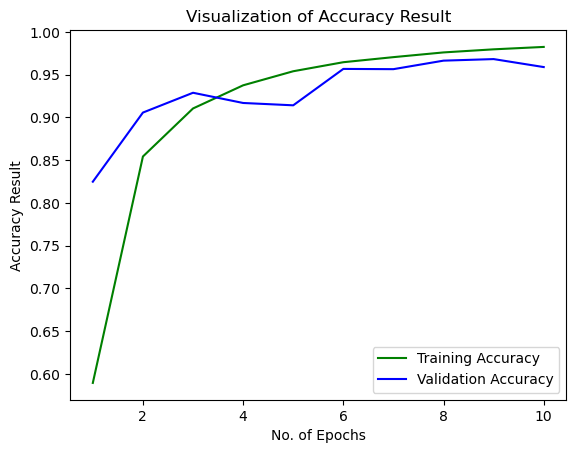

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [43]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [45]:
y_pred = cnn.predict(test_set)
y_pred

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 141s 8ms/step


array([[9.9945503e-01, 3.9373597e-04, 4.4659524e-07, ..., 4.9931125e-11,
        9.9586110e-11, 4.0588879e-09],
       [9.9976045e-01, 1.9733678e-04, 2.7415735e-08, ..., 2.5823723e-11,
        6.9303851e-12, 8.9172468e-11],
       [1.0000000e+00, 2.4333363e-11, 5.5037342e-12, ..., 1.3701874e-18,
        1.0779702e-17, 6.9619744e-13],
       ...,
       [3.9249316e-12, 5.5391222e-14, 8.8456319e-11, ..., 5.2692090e-11,
        4.3391944e-12, 9.9999774e-01],
       [2.1342064e-11, 5.2024133e-14, 3.1414118e-11, ..., 1.8989890e-10,
        4.0580052e-12, 9.9999988e-01],
       [5.5372018e-14, 2.3699882e-14, 2.8129026e-13, ..., 3.4743259e-13,
        2.1664615e-13, 1.0000000e+00]], dtype=float32)

In [46]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [48]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [49]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.91      0.98      0.95       502
                               Blueberry___healthy       0.98      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.80      0.88       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.85      0.99      0.

In [52]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[475,   2,   0, ...,   0,   0,   0],
       [  4, 492,   0, ...,   0,   0,   0],
       [  0,   0, 426, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ..., 482,   0,   0],
       [  0,   0,   0, ...,   0, 413,   0],
       [  0,   0,   1, ...,   0,   0, 480]])

# Confusion Matrix Visualization

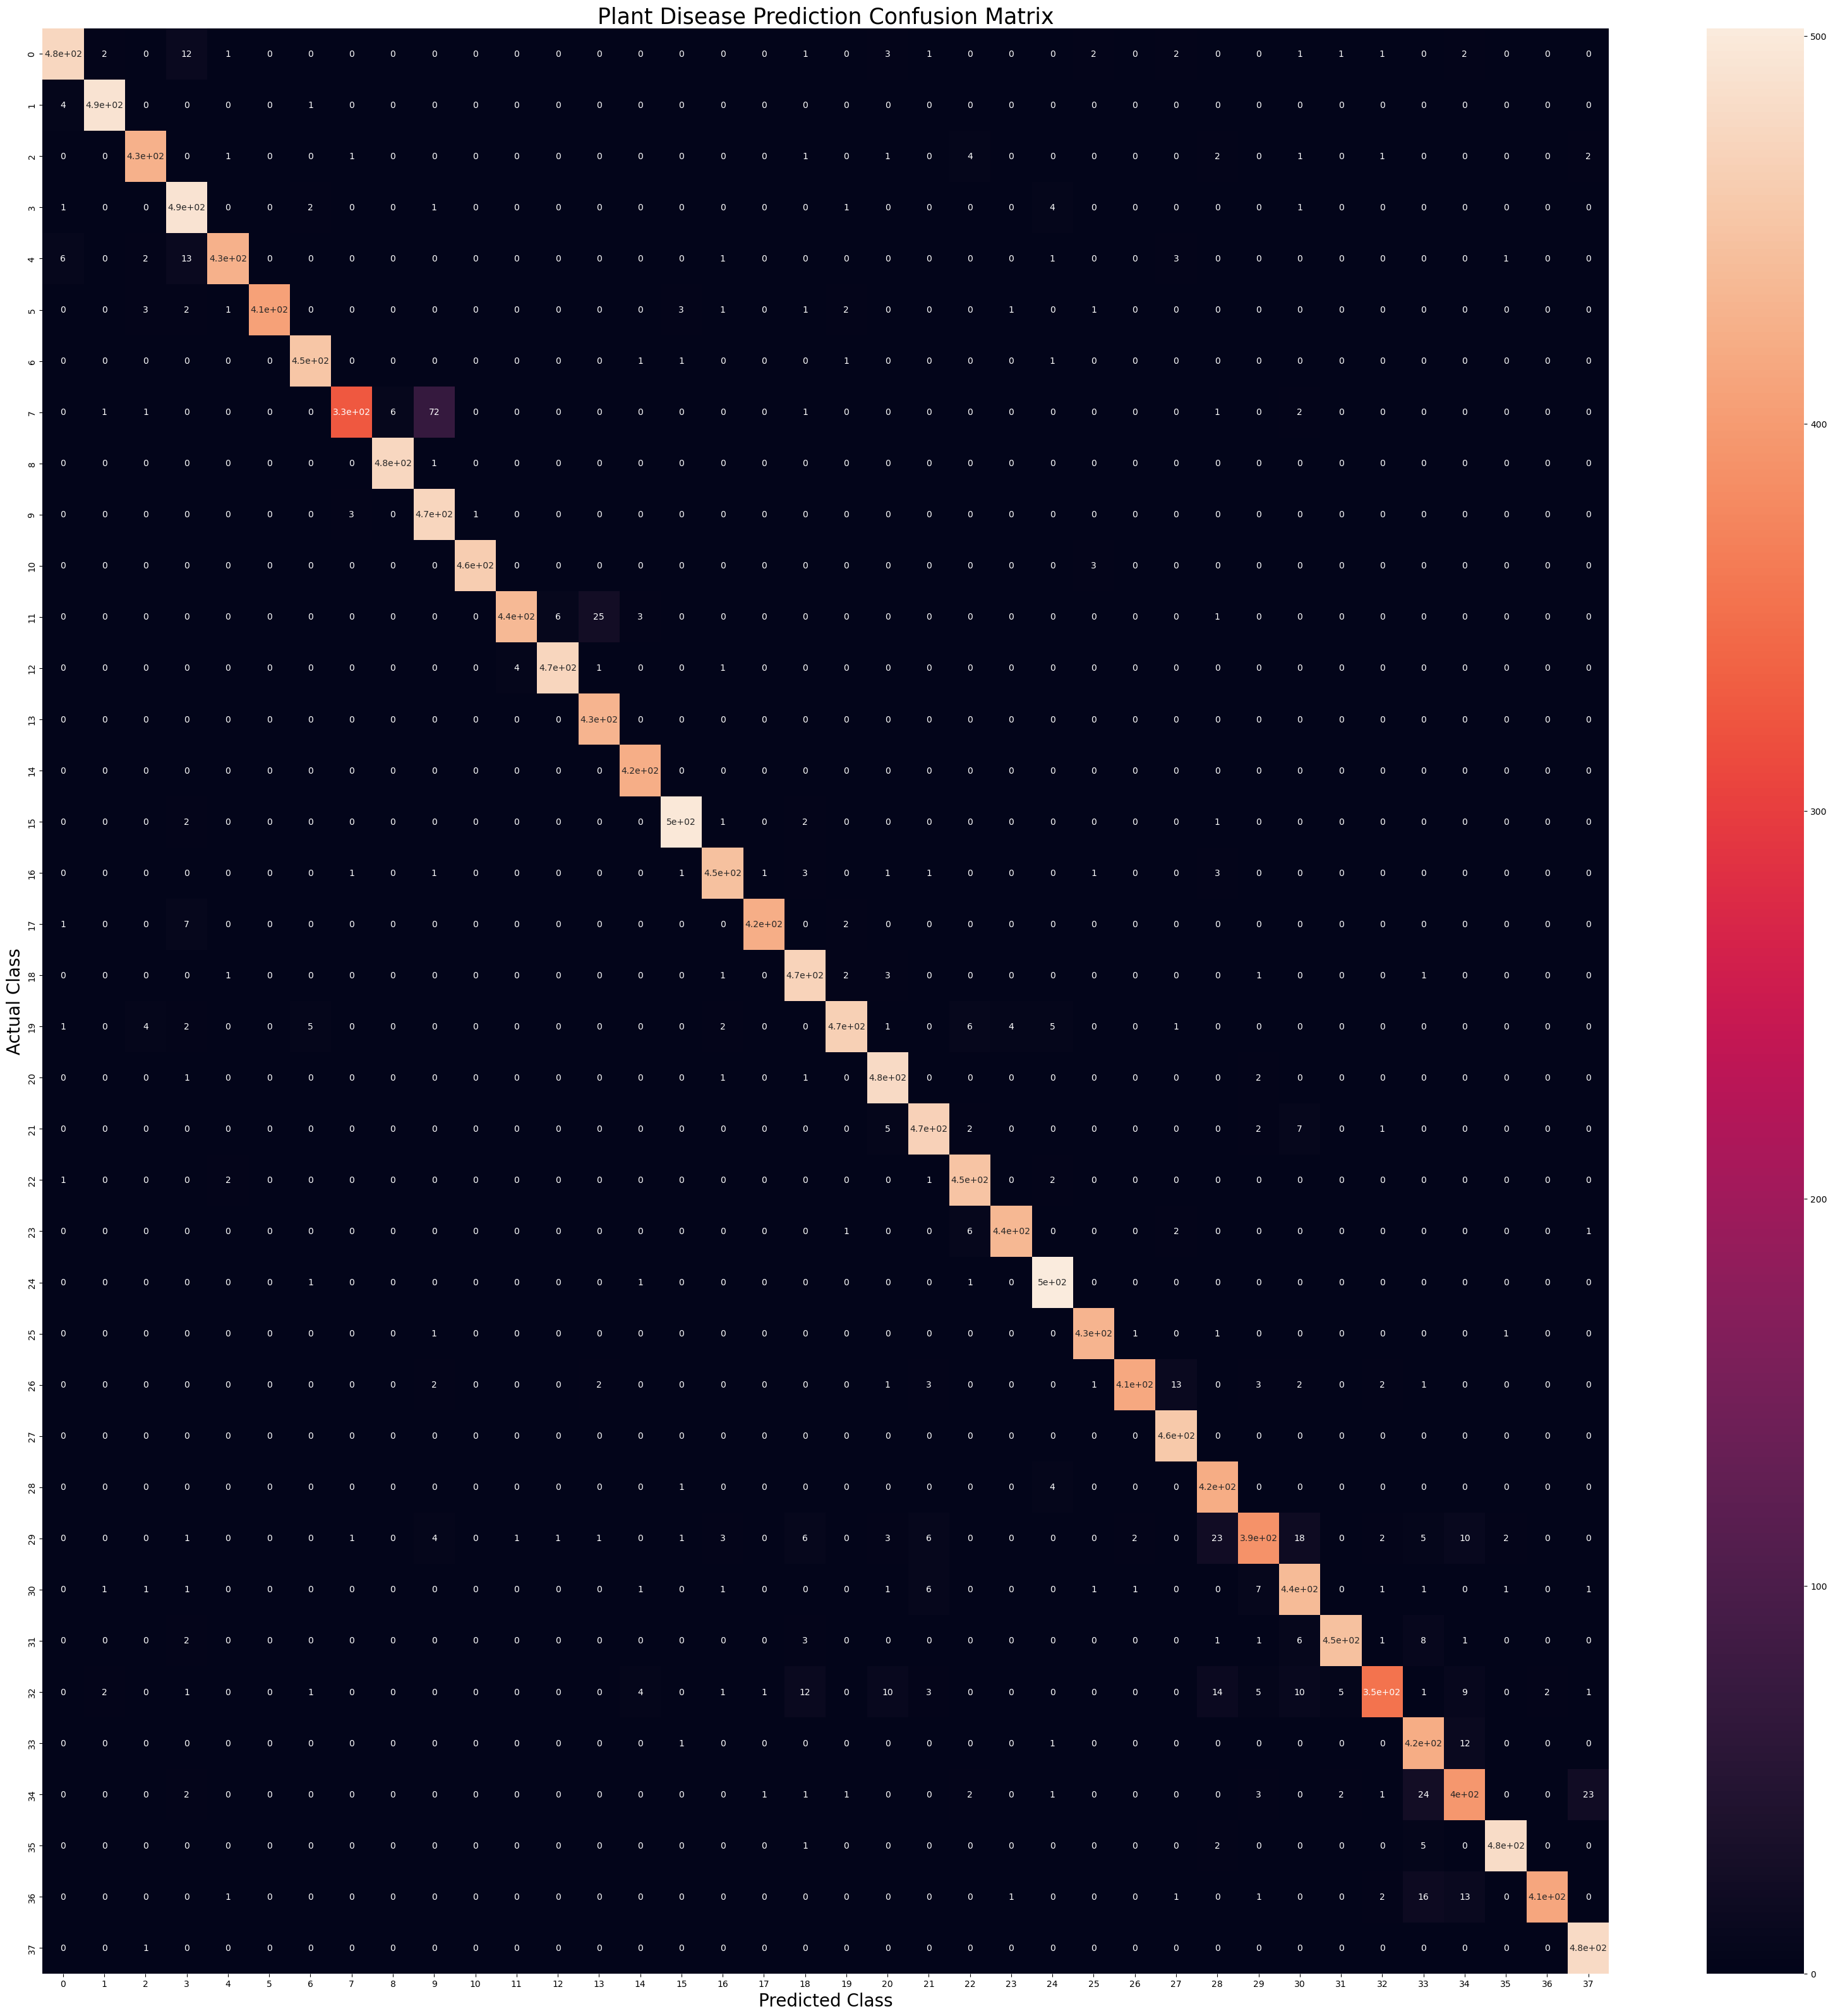

In [53]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()